### <font color="#00bfff">③ハイパーパラメーターをグリッドサーチで設定</font>

パイパーパラメータのチューニング<br>
<p style="text-indent:1em">①学習率：設定する範囲は0.005～0.01にする</p>
<p style="text-indent:1em">②学習回数</p>
<p style="text-indent:1em">③中間層増やす</p>
<p style="text-indent:1em">④ユニット数：2の乗数で決めることが多い　32.64.128.256.512など</p>

In [1]:
"""ライブラリのインポート
"""
import numpy as np
import pandas as pd

In [2]:
"""データの読み込み
"""
data=pd.read_csv('train.csv')

#### <font color="#FFD700">各カラムの意味</font>

| <font color="8EF1FF"> カラム名 </font>  | <font color="8EF1FF"> 意味  </font> |
|:-----------|:------------|
| PassengerId  | 乗客のID |
| Survived   | 生存フラグ（0=死亡、1=生存） |
| Pclass   | チケットクラス |
| Name   | 乗客の名前 |
| Sex   | 性別（male=男性、female＝女性） |
| SibSp     | 兄弟/配偶者の数 |
| parch    | 親/子供の数 |
| ticket    | チケット番号 |
| fare    | 料金 |
| cabin     | 客室番号 |
| Embarked     | 出港地（タイタニックへ乗った港） |


<span style="font-size: 15px; color: #8EF1FF;">pclass=チケットクラス</span><br>
<span style="font-size: 12px;">
1 = 上層クラス（お金持ち）<br>
2 = 中級クラス（一般階級）<br>
3 = 下層クラス（労働階級）</span>


<span style="font-size: 15px; color: #8EF1FF;">Embarked = 出港地（タイタニックへ乗った港）</span><br>
<span style="font-size: 12px;">
C = Cherbourg（フランス）<br>
Q = Queenstown（アイルランド）<br>
S = Southampton（イングランド）</span>


### ●基本統計量

In [3]:
"""dataの基本統計量
"""
data.describe()

#Age(年齢)・Cabin(客室番号)・Embarked(出港地)に欠損値あり
#外れ値なし

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ●Sex(性別)のダミー変数化
<p style="text-indent:2em">male=0 female=1　に置換</p>

In [4]:
"""ダミー変数化
"""
data["Sex"][data["Sex"]=='male']=0
data["Sex"][data["Sex"]=='female']=1

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### ●Age(年齢)の欠損値の補完

In [5]:
"""欠損値を平均値で補完
"""
data["Age"][data["Age"].isnull()]=data["Age"].mean()

#今回は平均値で埋めるが、実務ではニューラルネットを使い予測値で埋めることが一般的

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### ●データの分割

In [6]:
#説明変数(Pclass,Sex,Age,SibSp,Parch,Fare)
X=data.iloc[0:,[2,4,5,6,7,9]]
#目的変数(Survived)
y=data.iloc[0:,[1]]

"""訓練データとテストデータに分割(7:3)
"""
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

### ●グリッドサーチ

①最適な学習率の算出<br>
<p style="text-indent:1em">(0.005),(0.006),(0.007),(0.008),(0.009),(0.01)</p><br>
<p　style="text-indent:1em">結果</p>
<p　style="text-indent:2em">0.005</p>

②最適な学習回数の算出<br>
<p　style="text-indent:1em">学習率を0.005に固定</p>
<p style="text-indent:1em">(100),(200),(300),(400),(500)</p><br>
<p　style="text-indent:1em">結果</p>
<p　style="text-indent:2em">200</p>

③最適な中間層数の算出<br>
<p　style="text-indent:1em">学習率を0.005、学習回数を200に固定</p>
<p style="text-indent:1em">(64),(64,64),(64,64,64),(64,64,64,64),(64,64,64,64,64)</p><br>
<p　style="text-indent:1em">結果</p>
<p　style="text-indent:2em">(64,64,64,64,64)→5個</p>

④単調増加、単調減少、山なり、単調などの割り出し<br>
<p　style="text-indent:1em">学習率を0.005、学習回数を200に固定、中間層数は5個</p>
<p style="text-indent:1em">(32,64,128,256,512),(512,256,128,64,32),(256,128,64,128,256),(512,512,512,512,512)</p><br>
<p　style="text-indent:1em">結果</p>
<p　style="text-indent:2em">(512,512,512,512,512)</p>

⑤連続した値から最適数の算出<br>
<p　style="text-indent:1em">学習率を0.005、学習回数を200に固定、中間層数は5個</p>
<p style="text-indent:1em">(16,16,16,16,16),(32,32,32,32,32),(64,64,64,64,64),(128,128,128,128,128),(512,512,512,512,512)</p><br>
<p　style="text-indent:1em">結果</p>
<p　style="text-indent:2em">(512,512,512,512,512)</p>

⑥連続した値ジグザグな値から最適数の算出<br>
<p　style="text-indent:1em">学習率を0.005、学習回数を200に固定、中間層数は5個</p>
<p style="text-indent:1em">(512,512,512,512,512),(32,128,32,128,32),(64,256,64,256,64)</p><br>
<p　style="text-indent:1em">結果</p>
<p　style="text-indent:2em">(512,512,512,512,512)</p>

In [7]:
"""基本モデルの作成：回帰
"""
from sklearn.neural_network import MLPRegressor
clf=MLPRegressor(
    random_state=1234
)

In [8]:
"""グリッドサーチで学習率、学習回数、ユニット数の算出
"""
from sklearn import model_selection
clf_cv=model_selection.GridSearchCV(
    clf,
    {
        "learning_rate_init":[0.005], #学習率
        "max_iter":[200], #学習回数
        "hidden_layer_sizes":[(512,512,512,512,512),(64,128,64,128)] 
    },
)
clf_cv.fit(X_train,y_train)

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\py

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=1234, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'hidden_l

In [9]:
"""最適なパラメータの値
"""
clf_cv.best_params_

{'hidden_layer_sizes': (512, 512, 512, 512, 512),
 'learning_rate_init': 0.005,
 'max_iter': 200}

### ●ニューラルネット

In [10]:
"""基本モデルの作成：回帰
"""
#最適なパラメーターでモデルを作成
clf=MLPRegressor(**clf_cv.best_params_,random_state=1234)

In [11]:
"""X_trainとX_testをnumpy配列に変化し、正規化
"""
from scipy.stats import zscore
train_array=np.array(X_train)
train_array=train_array.astype(int)
X_train_array=zscore(train_array)

test_array=np.array(X_test)
test_array=test_array.astype(int)
X_test_array=zscore(test_array)

In [12]:
"""y_train,y_testを一次元に変換
"""
y_train=y_train.values.flatten()
y_test=y_test.values.flatten()

In [13]:
"""モデルの最適化
"""
#説明変数：X_train_array　目的変数,実測値：y_train
clf.fit(X_train_array,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(512, 512, 512, 512, 512),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1234,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [14]:
"""予測値の算出(訓練データ)
"""

#予測値：y_train_predict　　説明変数：X_train_array
y_train_predict=clf.predict(X_train_array)

#### <font color="#FFD700">さらに精度を上げる為に実測値から予測値を引いた値を予測する</font>

In [15]:
"""基本モデルの作成：回帰
"""
#最適なパラメーターでモデルを作成
clf_=MLPRegressor(**clf_cv.best_params_,random_state=1234)

In [16]:
"""実測値-予測値の差分 = 実測値 - 予測値
"""
#差分：train_difference　　実測値：y_train　　予測値：y_train_predict
train_difference=y_train-y_train_predict

In [17]:
"""差分を目的変数として学習させる(説明変数は同じ)
"""

#説明変数：X_train_array　　目的変数,差分：train_difference
clf_.fit(X_train_array,train_difference)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(512, 512, 512, 512, 512),
             learning_rate='constant', learning_rate_init=0.005, max_fun=15000,
             max_iter=200, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1234,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [18]:
"""差分の予測値の算出
"""

#差分の予測値：Difference_predict　　説明変数：X_train_array
train_difference_predict=clf_.predict(X_train_array)

In [19]:
"""実測値に近い値=予測値+差分の予測値
"""

#実測値に近い値：train_difference_predict_　　予測値：y_train_predict　　差分の予測値：train_difference_predict
train_difference_predict_=y_train_predict+train_difference_predict

In [20]:
"""値の置換
"""
#train_difference_predict_が0.5以上なら1　　train_difference_predict_が0.5以下なら0に置き換え
train_difference_predict_=[1 if o>0.5 else o for o in train_difference_predict_]
train_difference_predict_=[0 if i<0.5 else i for i in train_difference_predict_]

In [21]:
"""ライブラリのインストール
"""
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the 'c:\users\aika\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


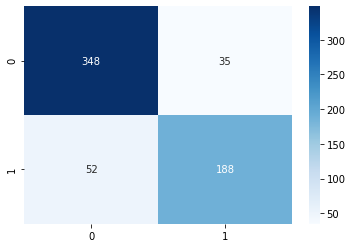

In [22]:
"""混同行列の表示
"""
from sklearn.metrics import confusion_matrix

#混同行列(Confusion Matrix)
cm=confusion_matrix(y_train, train_difference_predict_)

#fmt="d":整数で表示
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d")

In [23]:
"""精度の評価
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("精度:",round(accuracy_score(y_train, train_difference_predict_),3))

精度: 0.86


In [24]:
"""予測値の算出(テストデータ)
"""

#予測値:y_test_predict    説明変数:X_test_array
y_test_predict=clf.predict(X_test_array)

#### <font color="#FFD700">さらに精度を上げる為に実測値から予測値を引いた値を予測する</font>

In [25]:
"""実測値-予測値の差分 = 実測値 - 予測値
"""
#差分:test_difference    実測値:y_test    予測値:y_test_predict
test_difference=y_test-y_test_predict

In [26]:
"""差分の予測値の算出
"""

#差分の予測値:test_difference_predict    説明変数:X_test_array
test_difference_predict=clf_.predict(X_test_array)

In [27]:
"""実測値に近い値=予測値+差分の予測値
"""

#実測値に近い値:test_difference_predict_    予測値:y_test_predict    差分の予測値:test_difference_predict
test_difference_predict_=y_test_predict+test_difference_predict

In [28]:
"""値の置換
"""
#test_difference_predict_が0.5以上なら1　　test_difference_predict_が0.5以下なら0に置き換え
test_difference_predict_=[1 if j>0.5 else j for j in test_difference_predict_]
test_difference_predict_=[0 if k<0.5 else k for k in test_difference_predict_]

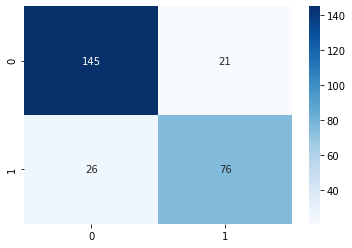

In [29]:
"""混同行列の表示
"""
from sklearn.metrics import confusion_matrix

#混同行列(Confusion Matrix)
cm=confusion_matrix(y_test, test_difference_predict_)

#fmt="d":整数で表示
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d")

In [30]:
"""精度の評価
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("精度:",round(accuracy_score(y_test, test_difference_predict_),3))

精度: 0.825
